In [45]:
import numpy as np
import pandas as pd
from plotnine import *
import tensorflow as tf

# Actividad, prediciendo imágenes

En esta actividad vamos a predecir un set de imagenes que viene precargado 

In [82]:
#Obteniendo el set de datos, 60000 dígitos escritos a mano entre 0 y 9 (incluído)
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

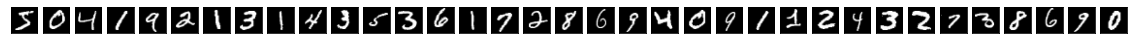

In [63]:
# usando Matplotlib (NO PREGUNTE)
import matplotlib.pyplot as plt

n = 35  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:

#Transforme cada uno de los datasets a valores del tipo float32 y dividalos por 255 para dejarlos entre 0 y 1
#Posteriormente, cambie las dimensiones de los datos para poder entrenar un modelo perceptron (use el método reshape)
#Discuta:
#¿Cuantas neuronas de entrada deberá tener el perceptron?: 
#¿Como debería ser la dimensión final de los datos?
#¿Cuál debería ser el output final del Perceptron (defina el problema de clasificación)?

"""
Respuestas: 
1. Dado que el input son imágenes de 28*28, entonces debería tener 784. Una por cada píxel.
2. Una matriz con 60000 filas, cada fila representa una imágen con sus 784 píxeles.
3. Deberían ser la probabilidad de pertenencia al conjunto de números del 0 al 9.
"""

Transformación de set de entrenamiento y testeo

In [83]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of training examples: ",x_train.shape[0],f"and each image is of shape({x_train.shape[1]})")
print("Number of test examples: ",x_test.shape[0],f"and each image is of shape({x_test.shape[1]})")

Number of training examples:  60000 and each image is of shape(784)
Number of test examples:  10000 and each image is of shape(784)


In [84]:
from keras.utils import np_utils

print("Class label of train first image: ",y_train[0])
print("Class label of test first image: ",y_test[0])

y_train = np_utils.to_categorical(y_train,10) # one hot encoding
y_test = np_utils.to_categorical(y_test,10)  # one hot encoding

print("After converting the output into a vector : ",y_train[0])
#print("After converting the output into a vector : ",y_test[0])
print(np.shape(y_train))
print(np.shape(y_test))

Class label of train first image:  5
Class label of test first image:  7
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)
(10000, 10)


In [95]:
#Cree y entrene el modelo perceptron, defina loss y o

from tensorflow.keras import *

inputLayer = layers.Input(shape=(784,)) #784 neuronas para cada pixel

outputLayer = layers.Dense(10,activation='sigmoid',use_bias = True)(inputLayer) # 0,1,...,9 el target a predecir

#Connecting the model
perceptron = models.Model(inputLayer, outputLayer)
perceptron.summary()


Metal device set to: Apple M1


2022-07-13 23:35:53.016997: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-13 23:35:53.018337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [96]:
#Encontré en internet que binarycrossentropy era útil para clasificar
#Leí también que sdg encontraba optimos para varios problemas.

perceptron.compile(loss='BinaryCrossentropy', optimizer = 'sgd',metrics=['binary_accuracy'])
perceptron.fit(x_train, y_train,epochs=500,batch_size=50,shuffle=True,verbose = 1)

2022-07-13 23:40:53.606048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-13 23:40:53.612494: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/500


2022-07-13 23:40:53.856901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1200/1200 [==============================] - 7s 4ms/step - loss: 0.3262 - binary_accuracy: 0.8910
Epoch 2/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2338 - binary_accuracy: 0.9124
Epoch 3/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1987 - binary_accuracy: 0.9287
Epoch 4/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1780 - binary_accuracy: 0.9390
Epoch 5/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1642 - binary_accuracy: 0.9452
Epoch 6/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1542 - binary_accuracy: 0.9496
Epoch 7/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1466 - binary_accuracy: 0.9528
Epoch 8/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1406 - binary_accuracy: 0.9553
Epoch 9/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1356 - binary_accuracy: 0.9573
Epoch 10/500
1200/1200

Epoch 75/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0851 - binary_accuracy: 0.9734
Epoch 76/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0849 - binary_accuracy: 0.9734
Epoch 77/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0848 - binary_accuracy: 0.9735
Epoch 78/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0846 - binary_accuracy: 0.9736
Epoch 79/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0844 - binary_accuracy: 0.9736
Epoch 80/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0843 - binary_accuracy: 0.9736
Epoch 81/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0841 - binary_accuracy: 0.9737
Epoch 82/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0840 - binary_accuracy: 0.9738
Epoch 83/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0838 - binary_accuracy: 0.9738
E

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0775 - binary_accuracy: 0.9758
Epoch 149/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0774 - binary_accuracy: 0.9758
Epoch 150/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0774 - binary_accuracy: 0.9759
Epoch 151/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0773 - binary_accuracy: 0.9759
Epoch 152/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0773 - binary_accuracy: 0.9759
Epoch 153/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0772 - binary_accuracy: 0.9759
Epoch 154/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0771 - binary_accuracy: 0.9759
Epoch 155/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0771 - binary_accuracy: 0.9759
Epoch 156/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0770 - binary_accuracy: 0.9760
Epoch 

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0740 - binary_accuracy: 0.9769
Epoch 222/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0739 - binary_accuracy: 0.9769
Epoch 223/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0739 - binary_accuracy: 0.9769
Epoch 224/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0739 - binary_accuracy: 0.9769
Epoch 225/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0738 - binary_accuracy: 0.9769
Epoch 226/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0738 - binary_accuracy: 0.9769
Epoch 227/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0738 - binary_accuracy: 0.9769
Epoch 228/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0737 - binary_accuracy: 0.9769
Epoch 229/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0737 - binary_accuracy: 0.9770
Epoch 

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0718 - binary_accuracy: 0.9775
Epoch 295/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0718 - binary_accuracy: 0.9775
Epoch 296/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0718 - binary_accuracy: 0.9775
Epoch 297/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0718 - binary_accuracy: 0.9776
Epoch 298/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0717 - binary_accuracy: 0.9776
Epoch 299/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0717 - binary_accuracy: 0.9775
Epoch 300/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0717 - binary_accuracy: 0.9776
Epoch 301/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0717 - binary_accuracy: 0.9776
Epoch 302/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0716 - binary_accuracy: 0.9776
Epoch 

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 368/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 369/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 370/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 371/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 372/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0703 - binary_accuracy: 0.9780
Epoch 373/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0702 - binary_accuracy: 0.9780
Epoch 374/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0702 - binary_accuracy: 0.9780
Epoch 375/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0702 - binary_accuracy: 0.9780
Epoch 

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 441/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 442/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 443/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 444/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 445/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 446/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9783
Epoch 447/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0691 - binary_accuracy: 0.9783
Epoch 448/500
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0691 - binary_accuracy: 0.9783
Epoch 

In [141]:
#Aplique el modelo a los datos de test y verifique que tan bien clasificó los números.

#Evaluating the model
perceptron.evaluate(x_test,y_test)
results=perceptron.predict(x_test,verbose=1)
#¿Cual es el accuracy general?

loss, acc = perceptron.evaluate(x_test, y_test, batch_size=50)
print("\nTest accuracy general: %.1f%%" % (100.0 * acc))

#¿Qué tan bien clasificó un número particular, por ejemplo 0?
#Para esto, determine el porcentaje de los números que eran 0 y los clasificaron como 0.

cero_target = np.array([0,0,0,0,0,0,0,1,0,0]).astype('float32')
# NO ME FUNCIONO : (  only_ceros = np.where(np.array_equal(y_test,cero_target))

#No se me ocurrió algo más eficente que esto 

ceros_array_x = np.zeros(((10000, 784)))
ceros_array_y = np.zeros((10000, 10))

for i in range(len(x_test)):
    if np.array_equal(y_test[i],cero_target):
        ceros_array_x[i] = x_test[i]
        ceros_array_y[i]= y_test[i]
        
loss, acc = perceptron.evaluate(ceros_array_x,ceros_array_y, batch_size=50)
print("\nTest accuracy para solo ceros: %.1f%%" % (100.0 * acc))

"""
Además, verifique el número de porcentaje de puntos que fueron clasificados como 0 pero no eran 0
 Este número sería 1- acurracy obtenido
"""


200/200 [==============================] - 1s 3ms/step - loss: 0.0665 - binary_accuracy: 0.9797

Test accuracy general: 98.0%
200/200 [==============================] - 1s 3ms/step - loss: 0.2101 - binary_accuracy: 0.9980

Test accuracy para solo ceros: 99.8%


'\nAdemás, verifique el número de porcentaje de puntos que fueron clasificados como 0 pero no eran 0\n Este número sería 1- acurracy obtenido\n'